In [5]:
library(ggplot2)
library(dplyr)
library(qvalue)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [6]:
####### Endodiff

In [7]:
filename = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/genetic_effect/MOFA10/eqtl_tot_genetic_effect_all.txt"
df = read.csv(filename, sep ="\t")
head(df)

,ENSG00000005059_CCDC109B_.4_110648632_T_A,ENSG00000006016_CRLF1_.19_18735221_G_T,ENSG00000006459_KDM7A_.7_139913409_G_A,ENSG00000013297_CLDN11_.3_170402765_T_C,ENSG00000021300_PLEKHB1_.11_73339784_G_A,ENSG00000029639_TFB1M_.6_155635808_C_G,ENSG00000033178_UBA6_.4_68480525_C_T,ENSG00000035115_SH3YL1_.2_256116_G_T,ENSG00000059377_TBXAS1_.7_139547370_G_A,ENSG00000063761_ADCK1_.14_78311319_G_A,...,ENSG00000248098_BCKDHA_.19_41937095_G_A,ENSG00000248124_RRN3P1_.16_21818292_A_C,ENSG00000250317_SMIM20_.4_25918516_A_G,ENSG00000253203_GUSBP3_.5_68922087_T_G,ENSG00000254184_TYW1B_.7_72200923_G_A,ENSG00000256018_HIST1H3G_.6_26198845_G_C,ENSG00000256073_C21orf119_.21_33728588_C_A,ENSG00000259024_TVP23C.CDRT4_.17_15434991_C_T,ENSG00000259803_SLC22A31_.16_89234110_G_C,ENSG00000267323_SLC25A1P5_.19_28298186_T_C
21843_1#10,-0.02336156,0.037167263,-0.029627685,0.18296979,-0.03793941,-0.029324411,0.031398501,-0.03962300,0.08013833,0.027498382,...,-0.08185803,-0.10862369,-0.10317566,-0.048543205,0.095111678,-0.002571070,-0.055608331,0.1931245,-0.06168149,0.054686251
21843_1#100,-0.04797379,-0.002567715,-0.050303678,0.14204539,-0.06425603,-0.017894114,-0.064683766,-0.08820444,0.23273882,0.040375905,...,-0.16133495,-0.45571807,-0.09858982,-0.095641305,0.007662211,-0.001386594,-0.094118770,0.2614240,-0.16271379,-0.037051849
21843_1#101,-0.01707154,-0.038323702,0.001072175,0.05068042,-0.04211749,-0.028163711,-0.079442257,-0.05854781,0.14245545,0.019225081,...,-0.08464140,-0.22917228,-0.08647358,-0.027566411,0.030433187,-0.038522875,-0.007152012,0.1489600,-0.08467373,-0.001068028
21843_1#102,-0.06849843,0.029141143,0.006591071,0.27772236,0.05210891,-0.039448204,0.002744249,-0.08783030,0.06083871,0.034590880,...,-0.05465162,-0.09382258,-0.12475134,-0.009728905,0.052761776,-0.008942713,-0.024298554,0.2108875,-0.06577307,0.020432219
21843_1#103,-0.02065975,0.017882432,-0.019780588,0.12713250,-0.04432031,-0.010911430,-0.024407791,-0.03931027,0.06883815,0.009218694,...,-0.04543236,-0.13128624,-0.06491895,-0.033262391,0.063575007,0.044047100,-0.037472203,0.1392061,-0.06160699,0.047756355
21843_1#105,0.03203034,0.029327187,-0.015424171,0.13315777,-0.03401761,-0.004702419,-0.075634975,-0.02003224,0.09548422,0.003292832,...,-0.08535482,-0.14593277,-0.07771164,-0.053617513,0.141638220,0.019637691,0.041395040,0.1576655,-0.03509197,0.113248113


In [8]:
nrow(df)
ncol(df)

[1] 33964

[1] 322

In [9]:
cells = rownames(df)

In [10]:
sce = readRDS("/hps/nobackup2/stegle/users/acuomo/endodiff_sce.rds")

In [11]:
sce

Loading required package: SingleCellExperiment
Loading required package: SummarizedExperiment
Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, p

class: SingleCellExperiment 
dim: 11231 36044 
metadata(4): log.exprs.offset log.exprs.offset log.exprs.offset
  log.exprs.offset
assays(3): tpm counts logcounts
rownames(11231): ENSG00000000003_TSPAN6 ENSG00000000419_DPM1 ...
  ENSG00000272325_NUDT3 ENSG00000272398_CD24
rowData names(17): exprs_collapsed_to ensembl_transcript_id ...
  is_intop2000hvg is_hvg
colnames(36044): 21843_1#10 21843_1#100 ... 24539_8#97 24539_8#98
colData names(123): adj_x adj_y ... princ_curve princ_curve_scaled01
reducedDimNames(1): PCA
spikeNames(1): ERCC
altExpNames(0):

In [12]:
logcounts(sce)[1:5,1:5]

,21843_1#10,21843_1#100,21843_1#101,21843_1#102,21843_1#103
ENSG00000000003_TSPAN6,5.5207770563,6.4562078,5.878671,4.8608241,5.903640
ENSG00000000419_DPM1,5.3924605058,6.0659226,6.838769,6.6142685,6.512403
ENSG00000000457_SCYL3,0.0001741556,0.3525966,0.000000,0.8259555,2.201697
ENSG00000000460_C1orf112,1.4719275194,4.5369683,4.318528,5.3730090,4.636175
ENSG00000001036_FUCA2,2.9088018801,3.8673273,3.321747,3.7364760,4.917576


In [13]:
df0 = logcounts(sce)
nrow(df0)
ncol(df0)

[1] 11231

[1] 36044

In [14]:
df0 = df0[,cells]
df0 = t(df0)

In [15]:
colnames(df) = gsub("_\\..*","",colnames(df))

In [16]:
df = df[order(rownames(df)),]
df0 = df0[order(rownames(df0)),]

In [17]:
df[1:2,1:2]
df0[1:2,1:2]

,ENSG00000005059_CCDC109B,ENSG00000006016_CRLF1
21241_6#10,0.050496295,-0.08795715
21241_6#100,-0.007695178,-0.02541356


,ENSG00000000003_TSPAN6,ENSG00000000419_DPM1
21241_6#10,5.195503,5.858594
21241_6#100,6.297961,5.596021


In [18]:
df = df[order(rownames(df)),]
df0 = df0[order(rownames(df0)),]

In [19]:
genes = colnames(df)
head(genes)
length(genes)

[1] "ENSG00000005059_CCDC109B" "ENSG00000006016_CRLF1"   
[3] "ENSG00000006459_KDM7A"    "ENSG00000013297_CLDN11"  
[5] "ENSG00000021300_PLEKHB1"  "ENSG00000029639_TFB1M"

[1] 322

In [20]:
common_genes = genes[genes %in% colnames(df0)]

In [21]:
df = df[,common_genes]
df0 = df0[,common_genes]

In [22]:
ncol(df)
ncol(df0)

[1] 315

[1] 315

In [23]:
r = c()
for (gene in colnames(df)){
    r = c(r,cor(df0[,gene],df[,gene]))
}

Warning message in cor(df0[, gene], df[, gene]):
“the standard deviation is zero”

In [24]:
head(r)

[1] -0.15016902 -0.15598889  0.07630207 -0.36068109  0.03465908 -0.20168966

In [25]:
df1 = data.frame(r =r , r2 = r**2)
head(df1,2)

r,r2
-0.1501690,0.02255073
-0.1559889,0.02433254


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”Warning message:
“Removed 1 rows containing missing values (geom_bar).”

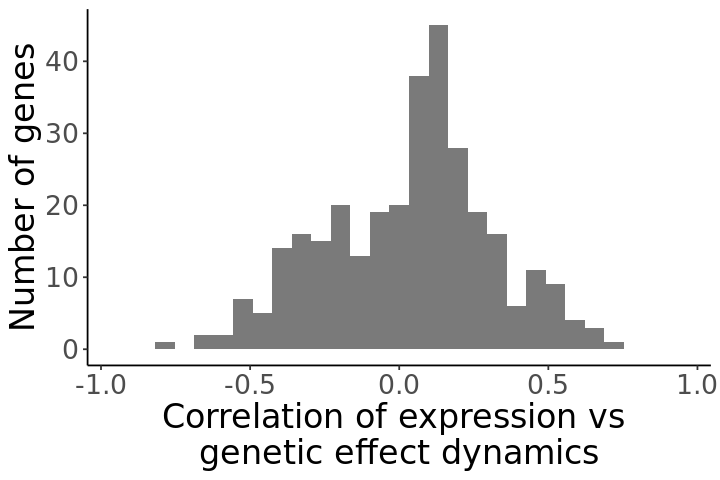

In [26]:
options(repr.plot.width=6, repr.plot.height=4)
ggplot(df1, aes(x=r)) + geom_histogram(alpha = 0.8) + xlim(c(-0.95,0.95)) +
    xlab("Correlation of expression vs \ngenetic effect dynamics") + 
    ylab("Number of genes") + theme_classic() + theme(text = element_text(size=20))

In [27]:
fig_dir = "/hps/nobackup2/stegle/users/acuomo/CellRegMap_data/figures/"
pdf(paste0(fig_dir,"SF6A_endodiff.pdf"), width=6, height=4)
ggplot(df1, aes(x=r)) + geom_histogram(alpha = 0.8) + xlim(c(-0.95,0.95)) +
    xlab("Correlation of expression vs \ngenetic effect dynamics") + 
    ylab("Number of genes") + theme_classic() + theme(text = element_text(size=20))
dev.off()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”Warning message:
“Removed 1 rows containing missing values (geom_bar).”

png 
  2

In [28]:
df1$gene = colnames(df)

In [36]:
head(df1)

r,r2,gene
-0.15016902,0.022550734,ENSG00000005059_CCDC109B
-0.15598889,0.024332535,ENSG00000006016_CRLF1
0.07630207,0.005822006,ENSG00000006459_KDM7A
-0.36068109,0.130090848,ENSG00000013297_CLDN11
0.03465908,0.001201252,ENSG00000021300_PLEKHB1
-0.20168966,0.040678720,ENSG00000029639_TFB1M


In [38]:
df1$gene[grep("FBLN1",df1$gene)]
df1$gene[grep("NANOG",df1$gene)]
df1$gene[grep("PPAPDC1A",df1$gene)]

[1] "ENSG00000077942_FBLN1"

[1] "ENSG00000111704_NANOG"   "ENSG00000176654_NANOGP1"

[1] "ENSG00000203805_PPAPDC1A"

In [39]:
df1[df1$gene %in% c("ENSG00000077942_FBLN1","ENSG00000111704_NANOG","ENSG00000203805_PPAPDC1A"),]

,r,r2,gene
18,0.6196480,0.3839636,ENSG00000077942_FBLN1
60,-0.7860179,0.6178242,ENSG00000111704_NANOG
281,-0.6257217,0.3915276,ENSG00000203805_PPAPDC1A


In [29]:
df1 <- df1[rowSums(is.na(df1)) == 0, ] 

In [30]:
nrow(df1[df1$r2>0.2,])
nrow(df1[df1$r2>0.2,])/nrow(df1)

[1] 40

[1] 0.1273885

In [31]:
sqrt(0.2)

[1] 0.4472136

In [32]:
nrow(df1[df1$r2>0.2 & df1$r>0,])
nrow(df1[df1$r2>0.2 & df1$r<0,])

[1] 24

[1] 16

In [33]:
df_corr = df1

In [34]:
df_corr[df_corr$r2>0.2,"gene"]

[1] "ENSG00000068697_LAPTM4A"  "ENSG00000075340_ADD2"    
 [3] "ENSG00000077942_FBLN1"    "ENSG00000106018_VIPR2"   
 [5] "ENSG00000110931_CAMKK2"   "ENSG00000111704_NANOG"   
 [7] "ENSG00000111913_FAM65B"   "ENSG00000114638_UPK1B"   
 [9] "ENSG00000117834_SLC5A9"   "ENSG00000118785_SPP1"    
[11] "ENSG00000120675_DNAJC15"  "ENSG00000124839_RAB17"   
[13] "ENSG00000125144_MT1G"     "ENSG00000128394_APOBEC3F"
[15] "ENSG00000129991_TNNI3"    "ENSG00000132031_MATN3"   
[17] "ENSG00000132386_SERPINF1" "ENSG00000135480_KRT7"    
[19] "ENSG00000141052_MYOCD"    "ENSG00000142089_IFITM3"  
[21] "ENSG00000142173_COL6A2"   "ENSG00000143494_VASH2"   
[23] "ENSG00000144120_TMEM177"  "ENSG00000144476_ACKR3"   
[25] "ENSG00000151725_CENPU"    "ENSG00000155366_RHOC"    
[27] "ENSG00000159182_PRAC1"    "ENSG00000165617_DACT1"   
[29] "ENSG00000166922_SCG5"     "ENSG00000173401_GLIPR1L1"
[31] "ENSG00000174469_CNTNAP2"  "ENSG00000176654_NANOGP1" 
[33] "ENSG00000184809_C21orf88" "ENSG00000196116_TDRD7"   
[35] "ENSG00000196542_SPTSSB"   "ENSG00000203805_PPAPDC1A"
[37] "ENSG00000204531_POU5F1"   "ENSG00000204711_C9orf135"
[39] "ENSG00000211772_TRBC2"    "ENSG00000214076_CPSF1P1"

In [71]:
mydir = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/"

In [72]:
########## MOFA 1:10
# results when using MOFA components 1-10 as cell context
file1 = paste0(mydir, "MOFA10/new4/summary.csv")
df1 = read.csv(file1, row.names=1)
nrow(df1)
head(df1,2)

[1] 4470

,gene,n_snps,chrom,pv_raw,snpID,pv
0,ENSG00000140905_GCSH,1,16,0.02606257,16_81118466_A_G,0.02606257
1,ENSG00000011523_CEP68,2,2,0.03995225,2_65279223_C_T,0.07990451


In [73]:
df1$qv = qvalue(df1$pv, pi0 = 1)$qvalue
# significant eQTLs (FDR<5%)
nrow(df1[df1$qv<0.05,])
# significant eGenes (FDR<5%)
length(unique(df1[df1$qv<0.05,"gene"]))
df_GxC = df1

[1] 411

[1] 315

In [74]:
head(df_GxC)

,gene,n_snps,chrom,pv_raw,snpID,pv,qv
0,ENSG00000140905_GCSH,1,16,0.02606257,16_81118466_A_G,0.02606257,0.1846271
1,ENSG00000011523_CEP68,2,2,0.03995225,2_65279223_C_T,0.07990451,0.3951030
2,ENSG00000011523_CEP68,2,2,0.11966021,2_65290842_C_A,0.23932042,0.7208641
3,ENSG00000178814_OPLAH,1,8,0.92344836,8_145114924_G_C,0.92344836,1.0000000
4,ENSG00000013583_HEBP1,1,12,0.46967349,12_13154105_A_T,0.46967349,0.9751233
5,ENSG00000143942_CHAC2,1,2,0.68758852,2_54010876_C_A,0.68758852,1.0000000


In [75]:
df_plot = inner_join(df_corr,df_GxC)
nrow(df_plot)
head(df_plot)

Joining, by = "gene"


[1] 487

r,r2,gene,n_snps,chrom,pv_raw,snpID,pv,qv
-0.15016902,0.022550734,ENSG00000005059_CCDC109B,2,4,0.5899743221,4_110425176_T_C,1.0000000000,1.000000000
-0.15016902,0.022550734,ENSG00000005059_CCDC109B,2,4,0.0002403215,4_110648632_T_A,0.0004806430,0.007728324
-0.15598889,0.024332535,ENSG00000006016_CRLF1,2,19,0.0215849558,19_18669987_G_A,0.0431699115,0.261373000
-0.15598889,0.024332535,ENSG00000006016_CRLF1,2,19,0.0007949091,19_18735221_G_T,0.0015898181,0.020840138
0.07630207,0.005822006,ENSG00000006459_KDM7A,1,7,0.0012994405,7_139913409_G_A,0.0012994405,0.017762995
-0.36068109,0.130090848,ENSG00000013297_CLDN11,1,3,0.0001910597,3_170402765_T_C,0.0001910597,0.003457640


In [76]:
cor.test(-log10(df_plot$pv_raw), df_plot$r2)


	Pearson's product-moment correlation

data:  -log10(df_plot$pv_raw) and df_plot$r2
t = 2.6699, df = 485, p-value = 0.007842
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.03183872 0.20699333
sample estimates:
      cor 
0.1203526 


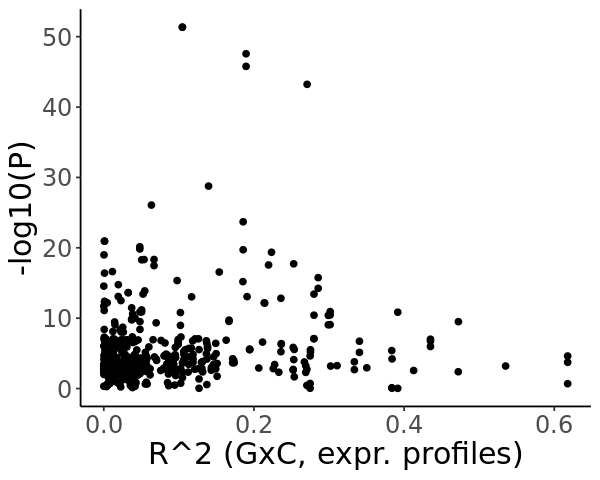

In [81]:
options(repr.plot.width=5, repr.plot.height=4)
ggplot(df_plot, aes(y=-log10(pv_raw), x=r2)) + geom_point() + theme_classic() + theme(text = element_text(size=18)) + 
    xlab("R^2 (GxC, expr. profiles)") + ylab("-log10(P)")

In [82]:
fig_dir = "/hps/nobackup2/stegle/users/acuomo/CellRegMap_data/figures/"
pdf(paste0(fig_dir,"SF6B_endodiff.pdf"), width=5, height=4)
ggplot(df_plot, aes(y=-log10(pv_raw), x=r2)) + geom_point() + theme_classic() + theme(text = element_text(size=18)) + 
    xlab("R^2 (GxC, expr. profiles)") + ylab("-log10(P)")
dev.off()

png 
  2

In [ ]:
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################

In [84]:
########## Neuroseq

In [85]:
df = read.csv("/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/genetic_effect/MOFA10/eqtl_tot_genetic_effect_all.txt", sep="\t",row.names = 1)
head(df)

,ABHD10_.3_111697439_T_G,ABHD12B_.14_51328222_C_T,ACKR2_.3_42817129_C_T,ADD2_.2_70894426_A_T,ADSL_.22_40757228_A_C,AIM1L_.1_26673825_C_T,AKAP7_.6_131691964_C_A,ALDH7A1_.5_126011412_G_A,ANKRD18B_.9_33524775_C_A,APIP_.11_34905987_T_C,...,YWHAE_.17_1246420_G_A,ZBBX_.3_167080934_T_G,ZC3HAV1_.7_138730361_T_C,ZFR2_.19_3840157_C_T,ZG16B_.16_2871121_T_C,ZNF423_.16_49599995_C_G,ZNF552_.19_58315273_G_A,ZNF738_.19_21474173_G_A,ZNF77_.19_2936535_G_A,ZP3_.7_76177284_C_T
HPSI0714i-iudw_1--DA--d30--0,-0.2108622,0.003924475,0.02206444,0.02834211,0.22351628,-0.035750325,-0.09473256,0.006901295,0.0006737957,-0.07499119,...,0.06962421,0.11202526,-0.041721326,0.011268972,0.10575791,-0.03101814,0.0909417,0.3020245,-0.15838420,-0.05596878
HPSI0714i-iudw_1--DA--d30--1,-0.2283969,-0.047217741,0.10596178,0.02514689,-0.19218007,-0.014717675,0.01878961,-0.171038975,-0.1105473675,-0.18686595,...,-0.21070417,0.37598541,0.087746659,0.025059162,-0.19500546,-0.22780547,0.0775938,0.3452492,-0.34721520,-0.15259400
HPSI0714i-iudw_1--DA--d30--2,-0.3702669,-0.187986589,0.11071216,-0.08986937,0.09405019,0.006010368,0.27231100,0.068950760,-0.0703046436,-0.17930619,...,0.08333262,0.22613170,0.001520982,0.026842708,-0.06898036,-0.18245915,0.1397725,0.2769493,-0.41400755,-0.14625096
HPSI0714i-iudw_1--DA--d30--3,-0.4690041,0.016038409,0.08790047,0.05432180,-0.04301341,-0.052857589,-0.08388531,-0.114040987,-0.0567014573,-0.10449033,...,-0.03074405,0.36092094,0.022946283,0.005356103,-0.06347749,-0.07845885,0.0968855,0.3661641,-0.28384550,-0.22302969
HPSI0714i-iudw_1--DA--d30--4,0.3503564,-0.236613003,0.01487196,-0.12134894,0.07402790,0.053992532,-0.00519023,0.141903046,-0.0635561162,-0.03331474,...,-0.02967722,-0.08769147,-0.087631920,0.064195619,-0.07719302,-0.07379042,0.1435780,0.1828284,-0.03142945,0.31337013
HPSI0714i-iudw_1--DA--d30--5,0.1012829,-0.244239442,0.08520448,-0.14295098,0.05632833,0.042455114,0.20805332,0.097543017,-0.0595425781,-0.11520636,...,0.01510769,0.01728996,-0.061095574,0.068456202,-0.09436485,-0.19404150,0.1471580,0.1729609,-0.21927488,0.15319374


In [86]:
ncol(df)

[1] 213

In [87]:
cells0 = rownames(df)

In [88]:
sce = readRDS("/hps/nobackup2/stegle/users/acuomo/neuoseq_DA_pseudocells_sce.rds")
sce

class: SingleCellExperiment 
dim: 32738 9219 
metadata(0):
assays(2): counts logcounts
rownames(32738): MIR1302.10 FAM138A ... AC002321.2 AC002321.1
rowData names(0):
colnames(9219): HPSI0714i-iudw_1--DA--d30--0
  HPSI0714i-iudw_1--DA--d30--1 ... HPSI0114i-rozh_4--DA--d52_tr--11
  HPSI0114i-rozh_4--DA--d52_tr--12
colData names(5): pseudocell celltype donor cluster condition
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [89]:
counts(sce)[1:5,1:5]

,HPSI0714i-iudw_1--DA--d30--0,HPSI0714i-iudw_1--DA--d30--1,HPSI0714i-iudw_1--DA--d30--2,HPSI0714i-iudw_1--DA--d30--3,HPSI0714i-iudw_1--DA--d30--4
MIR1302.10,0,0,0,0,0
FAM138A,0,0,0,0,0
OR4F5,0,0,0,0,0
RP11.34P13.7,0,0,0,0,0
RP11.34P13.8,0,0,0,0,0


In [90]:
df0 = counts(sce)
nrow(df0)
ncol(df0)

[1] 32738

[1] 9219

In [91]:
df0 = df0[,cells0]
rownames(df0) = gsub("\\.","-",rownames(df0))
df0 = t(df0)

In [92]:
nrow(df0)

[1] 8352

In [93]:
nrow(df)

[1] 8352

In [94]:
df[1:2,1:2]
df0[1:2,1:2]

,ABHD10_.3_111697439_T_G,ABHD12B_.14_51328222_C_T
HPSI0714i-iudw_1--DA--d30--0,-0.2108622,0.003924475
HPSI0714i-iudw_1--DA--d30--1,-0.2283969,-0.047217741


,MIR1302-10,FAM138A
HPSI0714i-iudw_1--DA--d30--0,0,0
HPSI0714i-iudw_1--DA--d30--1,0,0


In [95]:
colnames(df) = gsub("\\.","-",gsub("_\\..*","",colnames(df)))

In [96]:
df[1:2,1:2]
df0[1:2,1:2]

,ABHD10,ABHD12B
HPSI0714i-iudw_1--DA--d30--0,-0.2108622,0.003924475
HPSI0714i-iudw_1--DA--d30--1,-0.2283969,-0.047217741


,MIR1302-10,FAM138A
HPSI0714i-iudw_1--DA--d30--0,0,0
HPSI0714i-iudw_1--DA--d30--1,0,0


In [97]:
df = df[order(rownames(df)),]
df0 = df0[order(rownames(df0)),]

In [98]:
r = c()
for (gene in colnames(df)){
    r = c(r,cor(df0[,gene],df[,gene]))
}

Warning message in cor(df0[, gene], df[, gene]):
“the standard deviation is zero”

In [3]:
df_r = data.frame(r=r, r2=r **2)

ERROR: Error in data.frame(r = r, r2 = r^2): object 'r' not found


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

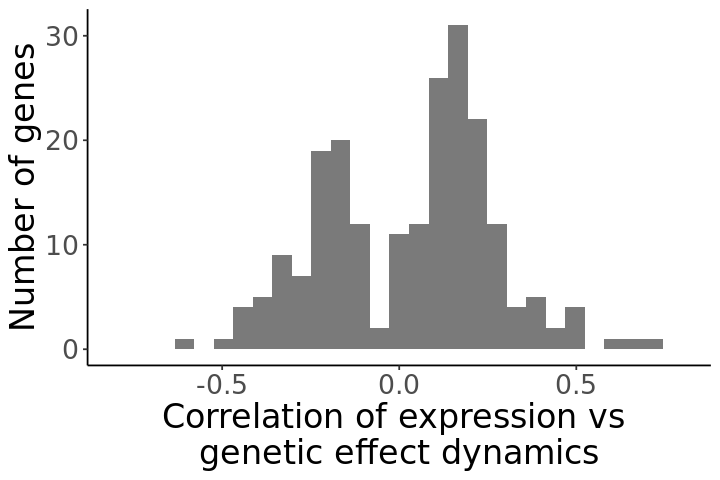

In [102]:
options(repr.plot.width=6, repr.plot.height=4)
ggplot(df_r, aes(x=r)) + geom_histogram(alpha = 0.8) + xlim(c(-0.8,0.8)) +
    xlab("Correlation of expression vs \ngenetic effect dynamics") + 
    ylab("Number of genes") + theme_classic() + theme(text = element_text(size=20))

In [103]:
fig_dir = "/hps/nobackup2/stegle/users/acuomo/CellRegMap_data/figures/"
pdf(paste0(fig_dir,"SF6A_neuroseq.pdf"), width=6, height=4)
ggplot(df_r, aes(x=r)) + geom_histogram(alpha = 0.8) + xlim(c(-0.8,0.8)) +
    xlab("Correlation of expression vs \ngenetic effect dynamics") + 
    ylab("Number of genes") + theme_classic() + theme(text = element_text(size=20))
dev.off()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

png 
  2

In [105]:
df_r$gene = colnames(df)
head(df_r)

r,r2,gene
0.2041484,0.04167658,ABHD10
-0.2470040,0.06101097,ABHD12B
-0.1040721,0.01083099,ACKR2
-0.3541595,0.12542894,ADD2
0.3399089,0.11553805,ADSL
0.1343502,0.01804998,AIM1L


In [106]:
mydir = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/MOFA/"

In [107]:
########## MOFA 1:10
# results when using MOFA components 1-10 as cell context
file1 = paste0(mydir, "MOFA10/summary.csv")
df1 = read.csv(file1, row.names=1)
nrow(df1)
head(df1,2)

[1] 2051

,gene,n_snps,chrom,pv_raw,snpID,pv,gene_old
0,LINC00662,1,19,0.05827479,19_28250771_G_A,0.05827479,LINC00662
1,ATRAID,2,2,0.66353704,2_27389195_A_G,1.00000000,ATRAID


In [108]:
df1$qv = qvalue(df1$pv, pi0 = 1)$qvalue
# significant eQTLs (FDR<5%)
nrow(df1[df1$qv<0.05,])
# significant eGenes (FDR<5%)
length(unique(df1[df1$qv<0.05,"gene"]))
df_GxC = df1

[1] 284

[1] 209

In [109]:
df_plot = inner_join(df_r,df_GxC)
nrow(df_plot)
head(df_plot)

Joining, by = "gene"


[1] 307

r,r2,gene,n_snps,chrom,pv_raw,snpID,pv,gene_old,qv
0.2041484,0.04167658,ABHD10,3,3,4.688236e-02,3_111637691_T_C,1.406471e-01,ABHD10,4.305066e-01
0.2041484,0.04167658,ABHD10,3,3,1.513774e-02,3_111689815_A_T,4.541323e-02,ABHD10,2.090925e-01
0.2041484,0.04167658,ABHD10,3,3,1.561781e-04,3_111697439_T_G,4.685343e-04,ABHD10,5.824023e-03
-0.2470040,0.06101097,ABHD12B,1,14,5.550779e-08,14_51328222_C_T,5.550779e-08,ABHD12B,1.997307e-06
-0.1040721,0.01083099,ACKR2,1,3,3.590770e-04,3_42817129_C_T,3.590770e-04,ACKR2,4.661184e-03
-0.3541595,0.12542894,ADD2,2,2,6.938277e-03,2_70884208_G_C,1.387655e-02,ADD2,8.784202e-02


In [110]:
cor.test(-log10(df_plot$pv_raw), df_plot$r2)


	Pearson's product-moment correlation

data:  -log10(df_plot$pv_raw) and df_plot$r2
t = 1.7622, df = 302, p-value = 0.07905
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.01174098  0.21098248
sample estimates:
      cor 
0.1008846 


Warning message:
“Removed 3 rows containing missing values (geom_point).”

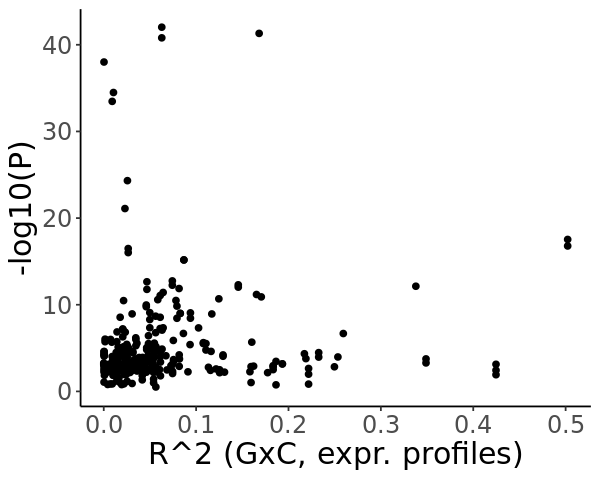

In [111]:
options(repr.plot.width=5, repr.plot.height=4)
ggplot(df_plot, aes(y=-log10(pv_raw), x=r2)) + geom_point() + theme_classic() + theme(text = element_text(size=18)) + 
    xlab("R^2 (GxC, expr. profiles)") + ylab("-log10(P)")

In [113]:
fig_dir = "/hps/nobackup2/stegle/users/acuomo/CellRegMap_data/figures/"
pdf(paste0(fig_dir,"SF6B_neuroseq.pdf"), width=6, height=4)
ggplot(df_plot, aes(y=-log10(pv_raw), x=r2)) + geom_point() + theme_classic() + theme(text = element_text(size=18)) + 
    xlab("R^2 (GxC, expr. profiles)") + ylab("-log10(P)")
dev.off()

Warning message:
“Removed 3 rows containing missing values (geom_point).”

png 
  2